In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

## Understand the data

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

## Data Preprocessing

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
data.Gender = le.fit_transform(data.Gender)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [11]:
data.Gender.unique()

array([1, 0])

In [12]:
data.Gender.value_counts()

0    112
1     88
Name: Gender, dtype: int64

### univariate Analysis

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

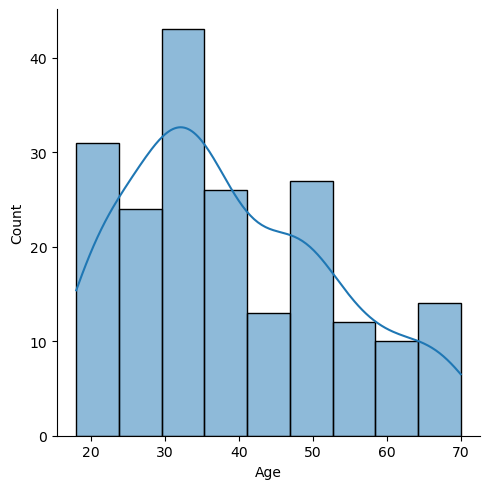

In [14]:
sns.displot(data.Age,kde=True)

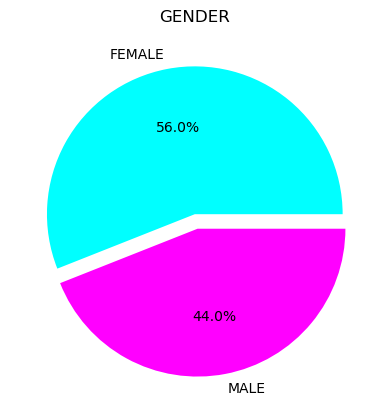

In [15]:
plt.pie(data.Gender.value_counts(),[0,0.1],labels = ['FEMALE','MALE'],autopct ='%1.1f%%',colors = ['CYAN','MAGENTA'])
plt.title('GENDER')
plt.show()

### Bivariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

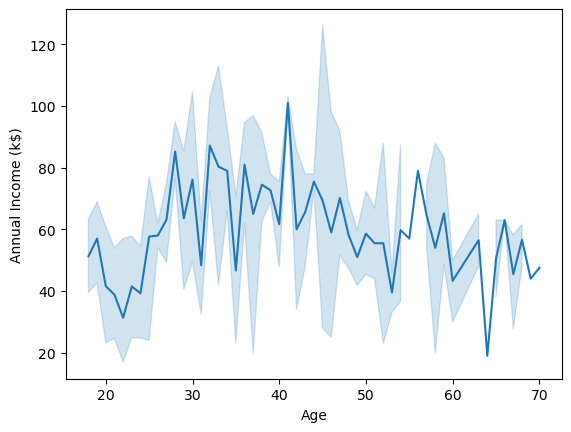

In [16]:
sns.lineplot(x = data.Age,y=data["Annual Income (k$)"])

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

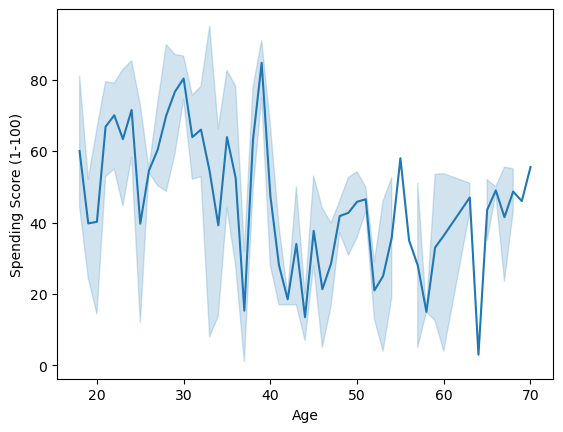

In [17]:
sns.lineplot(x = data.Age,y=data["Spending Score (1-100)"])

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

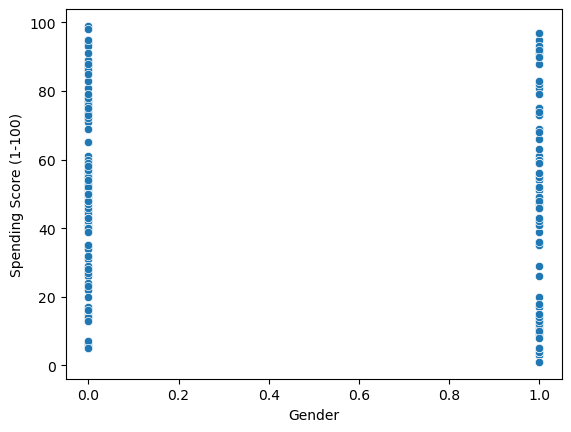

In [18]:
sns.scatterplot(x = data.Gender,y=data["Spending Score (1-100)"])

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

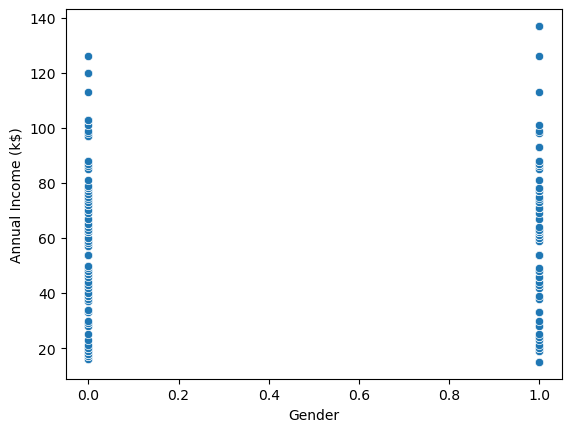

In [19]:
sns.scatterplot(x = data.Gender,y=data["Annual Income (k$)"])

### Multivariate Analysis

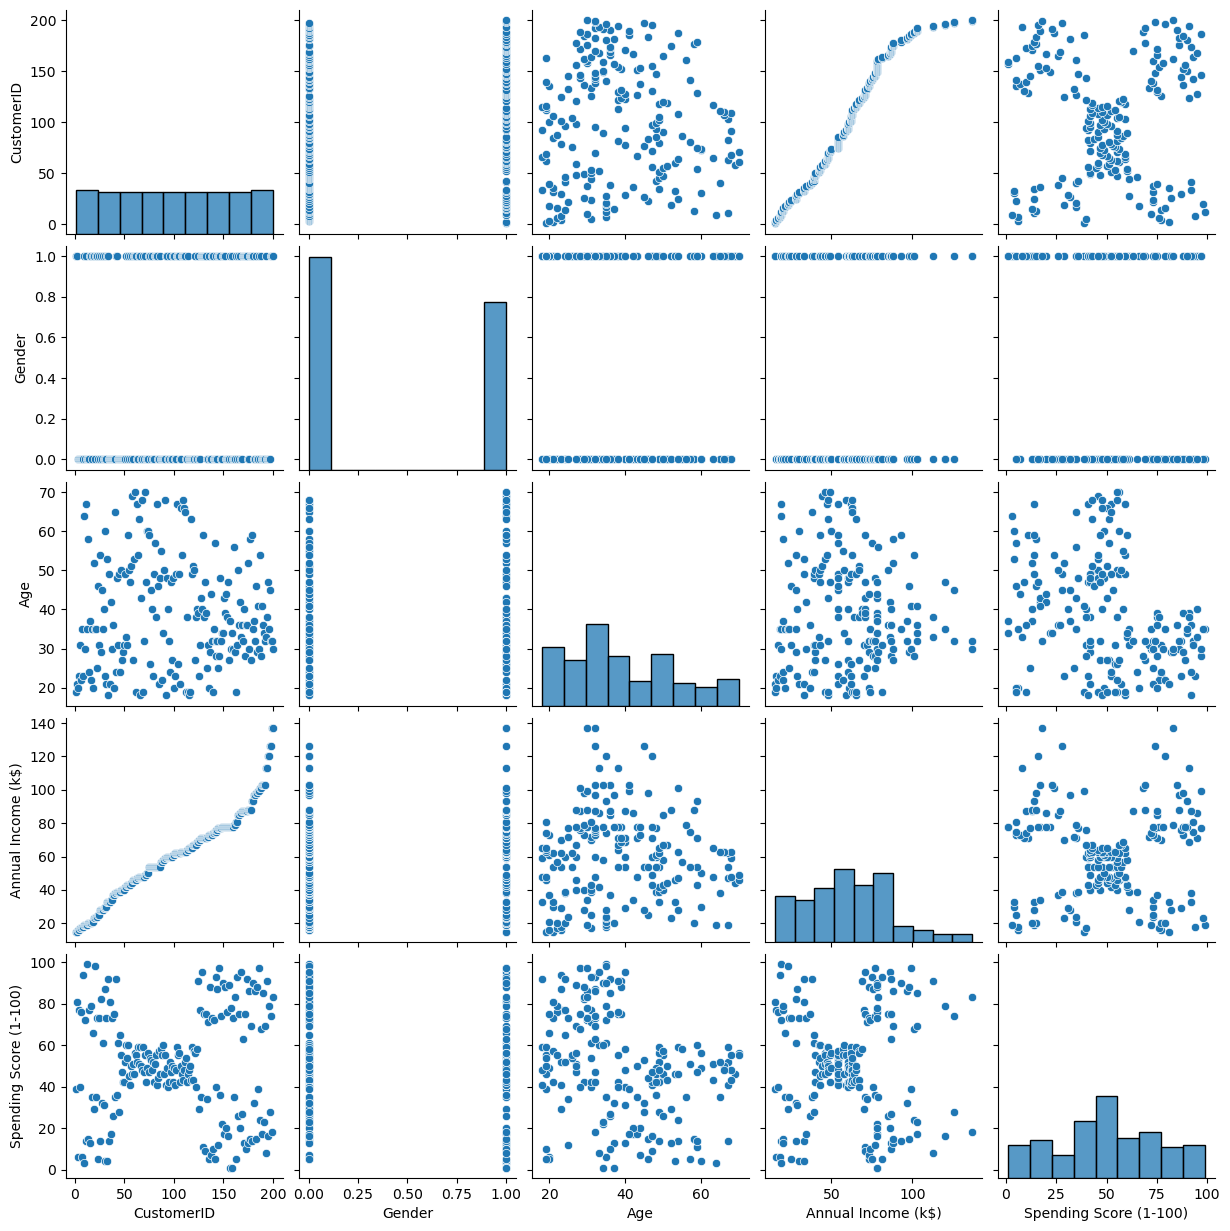

In [20]:
sns.pairplot(data)

<AxesSubplot:>

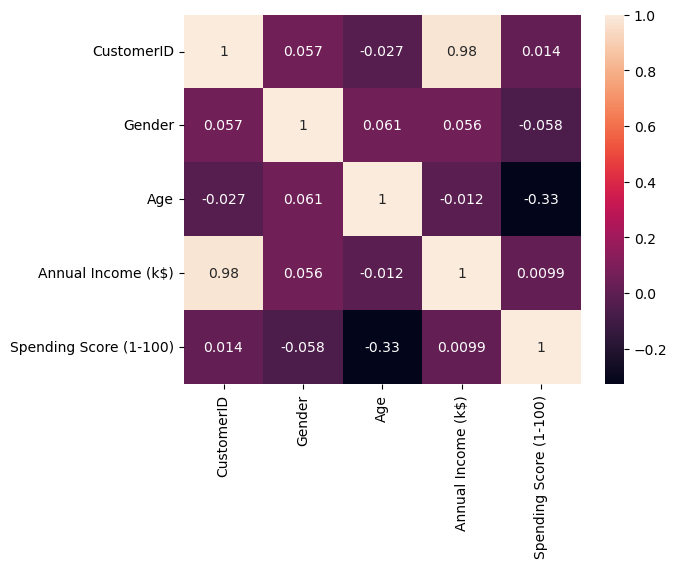

In [21]:
sns.heatmap(data.corr(),annot=True)

## Machine Learning approach with clustering algorithm 
**KNN**

In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters=5)

In [24]:
kmeans.fit(X=data.drop('CustomerID',axis=1))

/Users/rishunand/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [25]:
kmeans.cluster_centers_

array([[ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739]])

AttributeError: 'DataFrame' object has no attribute 'label'

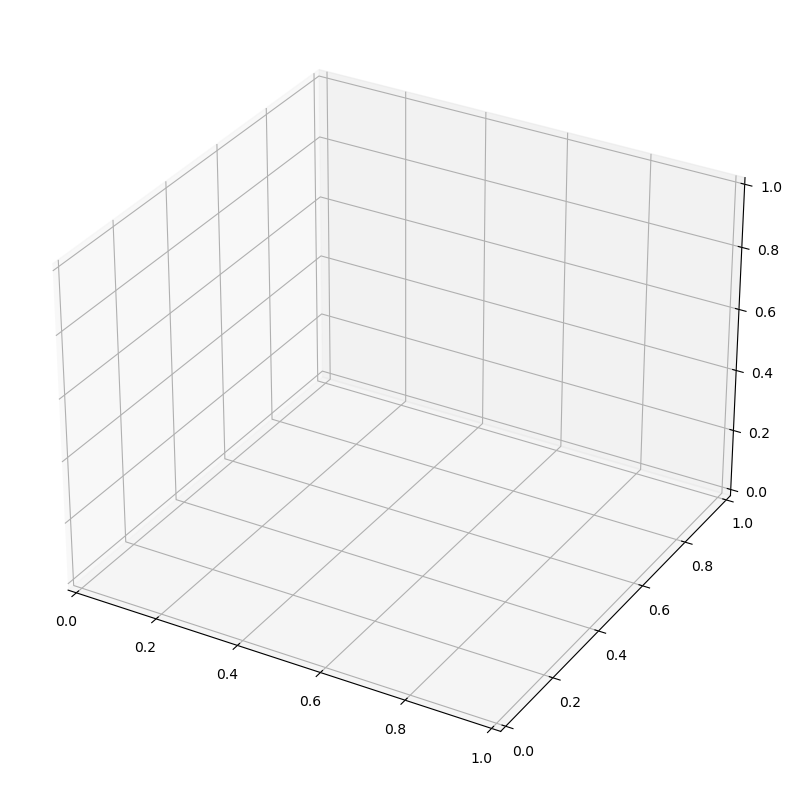

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.label == 0], data["Annual Income (k$)"][data.label == 0], data["Spending Score (1-100)"][data.label == 0], c='blue', s=60)
ax.scatter(data.Age[data.label == 1], data["Annual Income (k$)"][data.label == 1], data["Spending Score (1-100)"][data.label == 1], c='red', s=60)
ax.scatter(data.Age[data.label == 2], data["Annual Income (k$)"][data.label == 2], data["Spending Score (1-100)"][data.label == 2], c='green', s=60)
ax.scatter(data.Age[data.label == 3], data["Annual Income (k$)"][data.label == 3], data["Spending Score (1-100)"][data.label == 3], c='orange', s=60)
ax.scatter(data.Age[data.label == 4], data["Annual Income (k$)"][data.label == 4], data["Spending Score (1-100)"][data.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()